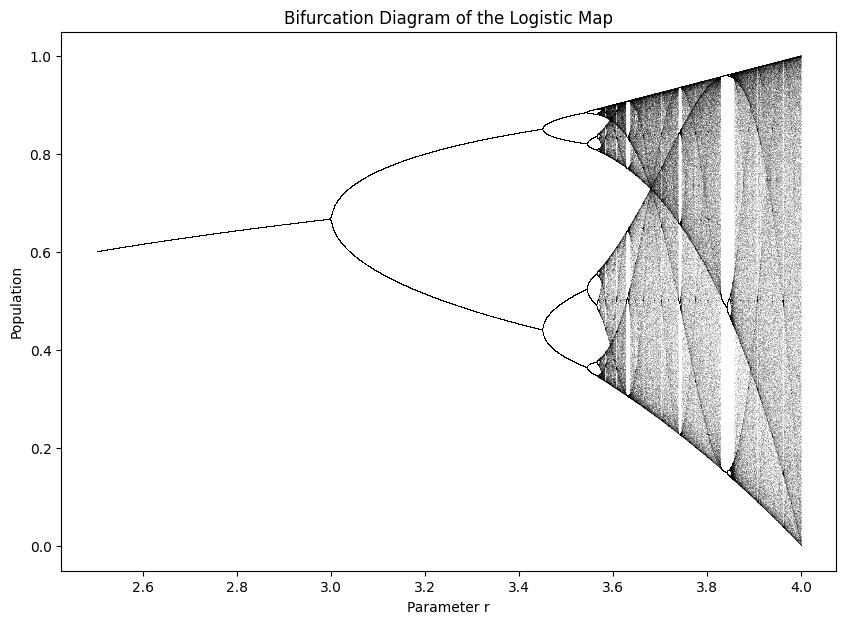

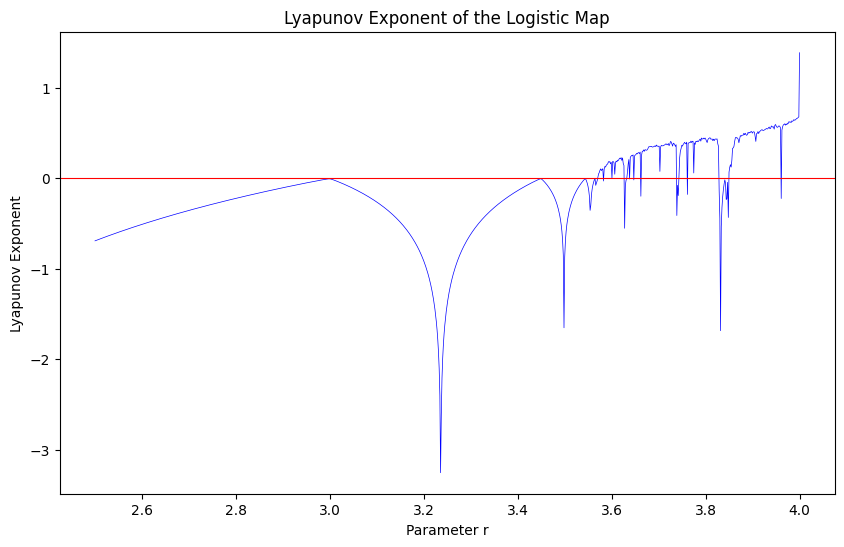

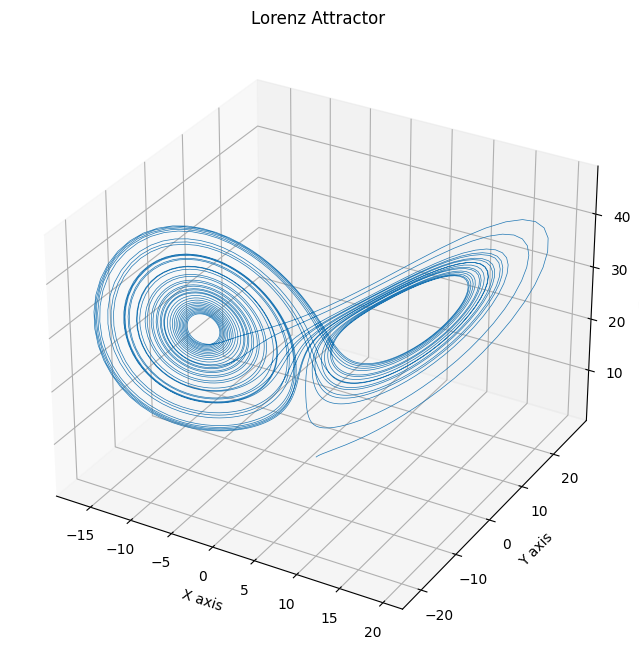

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import jit

# Logistic Map Example
def logistic_map(r, x, n_iter=1000):
    """Generates logistic map values for given r and initial x."""
    x_vals = np.zeros(n_iter)
    x_vals[0] = x
    for i in range(1, n_iter):
        x_vals[i] = r * x_vals[i - 1] * (1 - x_vals[i - 1])
    return x_vals

# Bifurcation Diagram for Logistic Map
def plot_bifurcation(r_min=2.5, r_max=4.0, n_iter=1000, last=100):
    """Generates and plots the bifurcation diagram for the logistic map."""
    r_values = np.linspace(r_min, r_max, 10000)
    x0 = 0.5  # Starting x value

    plt.figure(figsize=(10, 7))
    for r in r_values:
        x_vals = logistic_map(r, x0, n_iter)
        plt.plot([r] * last, x_vals[-last:], ',k', alpha=0.1)

    plt.title("Bifurcation Diagram of the Logistic Map")
    plt.xlabel("Parameter r")
    plt.ylabel("Population")
    plt.show()

# Lyapunov Exponent Calculation for Logistic Map
def lyapunov_exponent_logistic(r, n_iter=1000, x0=0.5):
    """Calculates the Lyapunov exponent for the logistic map."""
    x = x0
    lyapunov_sum = 0
    for _ in range(n_iter):
        x = r * x * (1 - x)
        lyapunov_sum += np.log(abs(r * (1 - 2 * x)))
    return lyapunov_sum / n_iter

def plot_lyapunov(r_min=2.5, r_max=4.0, n_iter=1000):
    """Plots Lyapunov exponent values for a range of r values."""
    r_values = np.linspace(r_min, r_max, 1000)
    lyapunov_values = [lyapunov_exponent_logistic(r, n_iter) for r in r_values]

    plt.figure(figsize=(10, 6))
    plt.plot(r_values, lyapunov_values, 'b-', lw=0.5)
    plt.axhline(0, color='red', lw=0.8)
    plt.title("Lyapunov Exponent of the Logistic Map")
    plt.xlabel("Parameter r")
    plt.ylabel("Lyapunov Exponent")
    plt.show()

# Lorenz System Example
def lorenz_system(t, state, sigma=10, rho=28, beta=8/3):
    """Defines the Lorenz system of differential equations."""
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Solve and plot Lorenz attractor
def plot_lorenz(x0=1.0, y0=1.0, z0=1.0, t_max=40, dt=0.01):
    """Simulates and plots the Lorenz attractor."""
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    initial_state = [x0, y0, z0]

    sol = solve_ivp(lorenz_system, t_span, initial_state, t_eval=t_eval, method='RK45')
    x, y, z = sol.y

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(x, y, z, lw=0.5)
    ax.set_title("Lorenz Attractor")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()

# Generate plots
plot_bifurcation()             # Plot bifurcation diagram for logistic map
plot_lyapunov()                # Plot Lyapunov exponents for logistic map
plot_lorenz()                  # Plot Lorenz attractor
